In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import scipy
from  scipy import ndimage

from tqdm import tqdm
from IPython.display import clear_output

np.random.seed(2)
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

In [2]:
# Load the data
train = pd.read_csv("train.csv")
#rain.head()

In [3]:
Y_train = train["label"]
#print(Y_train.value_counts())

X_train = train.drop(labels = ["label"],axis = 1) 
X_train = X_train.values.reshape(-1,28,28,1)

X_trainZoom=np.zeros((X_train.shape[0],56,56,1))
for image_id in tqdm(range(X_train.shape[0])):
    X_trainZoom[image_id,:,:,0]=scipy.ndimage.zoom(X_train[image_id,:,:,0], 2, order=1)


#del train 

100%|██████████████████████████████████████████████████████████████████████████| 42000/42000 [00:06<00:00, 6148.44it/s]


Iteration: 40480


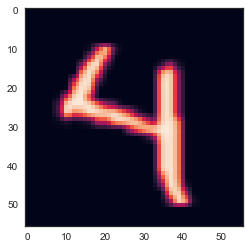

number= 
1     4684
7     4401
3     4351
9     4188
2     4177
6     4137
0     4132
8     4063
5     3795
4     3788
10     284
Name: label, dtype: int64


In [28]:
for i in range(40450,40481):
    clear_output()
    if Y_train[i]==4:
        print("Iteration: " + str(i))
        g = plt.imshow(X_trainZoom[i][:,:,0])
        plt.show()
        number = input("number= ")
        if number!="":
            Y_train[i]=10
print(Y_train.value_counts())

In [29]:
Y_train.to_csv("new_lables.csv")